In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
btslog_path = r'D:\userdata\anliu\Desktop\BTSLogs_T333'
btslog_name = r'SYSLOG_211.LOG'
btslog_file = os.path.join(btslog_path, btslog_name)

try:
    os.chdir(btslog_path)
except:
    print("The folder does not existed!")
    
# 读取文件返回文件每一行
def lines(file):
    for line in file:
        yield line

                
p_rc = r'(FSP-\d+)\s*<\d{4}-\d{2}-\d{2}T(\d{2}:\d{2}:\d{2}\.\d+)Z>.*RC:SFN:(\d+\.\d+\.\d+),lncellId=(\d+),port=(\d),TO=(-?\d+),Phase=(-?\d+\.\d+),tmpRatio=(\d+\.\d+),AmpRatio=(\d+\.\d+),smtTO=(-?\d+),smtPhase=(-?\d+\.\d+),Ep\/No=(\d+\.\d+).*'    
p_tc = r'(FSP-\d+)\s*<\d{4}-\d{2}-\d{2}T(\d{2}:\d{2}:\d{2}\.\d+)Z>.*TC:SFN:(\d+\.\d+\.\d+),lncellId=(\d+),port=(\d),TO=(-?\d+),Phase=(-?\d+\.\d+),tmpRatio=(\d+\.\d+),amp=(\d+\.\d+),smtTO=(-?\d+),smtPhase=(-?\d+\.\d+),Ep\/No=(\d+\.\d+).*'

time_rc = []
cid_rc = []
port_rc = []
epno_rc = []

time_tc = []
cid_tc = []
port_tc = []
epno_tc = []

with open(btslog_file) as f: 
    for line in lines(f):   
        rc_match = re.search(p_rc, line.strip())
        tc_match = re.search(p_tc, line.strip())
        if rc_match != None:  
            time_rc.append(rc_match.group(2))
            cid_rc.append(rc_match.group(4))
            port_rc.append(rc_match.group(5))
            epno_rc.append(rc_match.group(12))
        if tc_match != None:
            time_tc.append(tc_match.group(2))
            cid_tc.append(tc_match.group(4))
            port_tc.append(tc_match.group(5))
            epno_tc.append(tc_match.group(12))



rc_data = pd.DataFrame({'Time': time_rc, 'CellID': cid_rc, 'Port': port_rc, 'Ep/No': epno_rc})
tc_data = pd.DataFrame({'Time': time_tc, 'CellID': cid_tc, 'Port': port_tc, 'Ep/No': epno_tc}) 
rc_data['Ep/No'] = rc_data['Ep/No'].astype(float)
tc_data['Ep/No'] = tc_data['Ep/No'].astype(float)
rc_data['Time'] = pd.to_datetime(rc_data['Time'])
tc_data['Time'] = pd.to_datetime(tc_data['Time'])

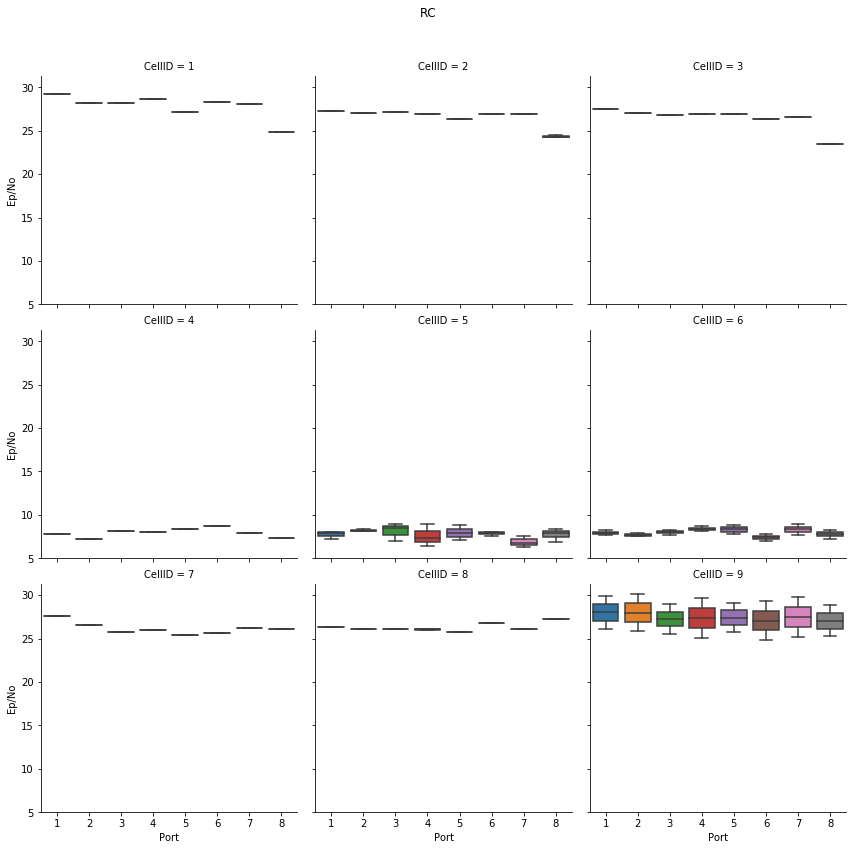

In [3]:
g = sns.factorplot(x='Port', y="Ep/No", col='CellID', col_wrap=3, kind='box', data=rc_data, size=4, aspect=1.0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('RC')
g.savefig("RC.png")

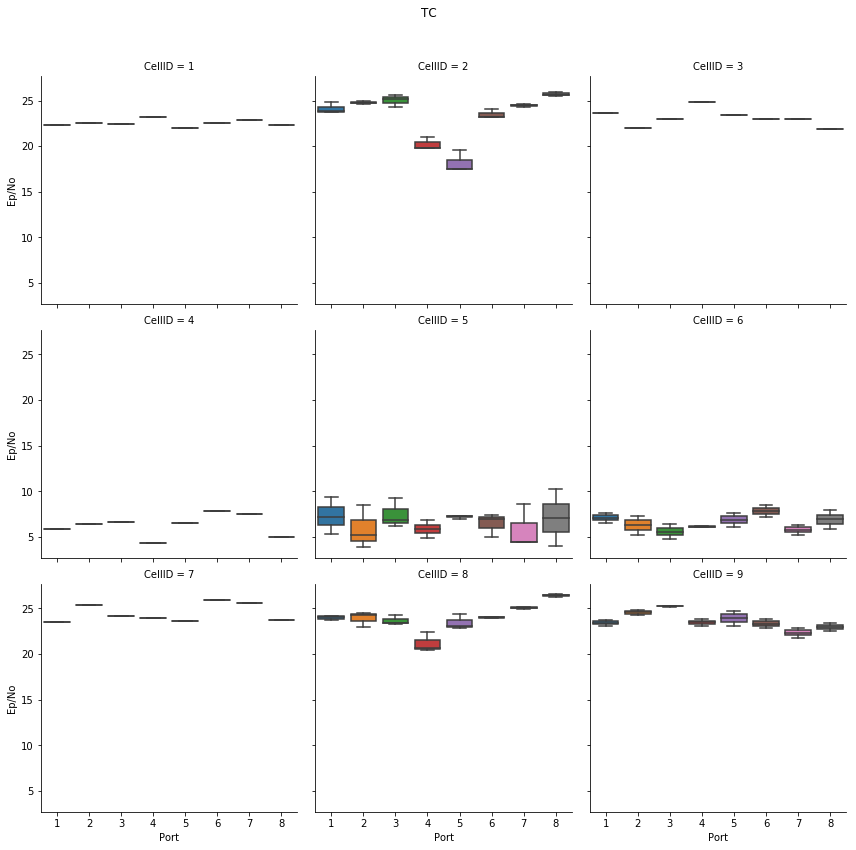

In [4]:
g = sns.factorplot(x='Port', y="Ep/No", col='CellID', col_wrap=3, kind='box', data=tc_data, size=4, aspect=1.0)
plt.subplots_adjust(top=0.9)
g.fig.suptitle('TC')
g.savefig("TC.png")